<a href="https://colab.research.google.com/github/ehdwn0730/LOL_analysis_project/blob/main/LOL_restart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 968 kB 7.5 MB/s 
     |████████████████████████████████| 138 kB 70.2 MB/s 
     |████████████████████████████████| 359 kB 69.3 MB/s 
     |████████████████████████████████| 3.6 MB 59.7 MB/s 
     |████████████████████████████████| 55 kB 5.8 MB/s 
     |████████████████████████████████| 58 kB 8.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.down

In [3]:
# 라이브러리
import selenium
import time
import requests
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from selenium import webdriver
#from webdriver_manager.chrome import ChromeDriverManager

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # 내부창을 띄울수 없어서 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [5]:
# 네이버 뉴스로 사전 연습

url = "https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=102&oid=005&aid=0001503196" 
driver.get(url)
time.sleep(1)

In [6]:
article_head = driver.find_element_by_css_selector('h3.tts_head')
print("기사 제목 : " + article_head.text)

기사 제목 : [속보] 신규확진 3만6362명…오미크론 확산에 첫 3만명대 돌파


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  """Entry point for launching an IPython kernel.


In [7]:
# 롤 디벨로퍼 시작
api_key = 

In [13]:
# 소환사 정보
name = input("소환사의 닉네임을 입력 : ")
Summoner = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + name
Sum_r = requests.get(Summoner, headers={"X-Riot-Token" : api_key})
Sum_r.json()

소환사의 닉네임을 입력 : 눈뜨면평일


{'accountId': 'eX_Xe6R4XT8Ti3le7gtkL0uPOK37f_k5CFf4kEtfZTg2',
 'id': 'neTb7bAJ23oYvelAesqH7q4-Ypbr4ju7ffETxcCdPybriQ',
 'name': '눈뜨면평일',
 'profileIconId': 5213,
 'puuid': 'kf_ghwPnR0XHfOO4b_Mf-Dt2xcWn4PUGNWiParJgJF-j_G4ym5--V-dX_9BmyeZH9mWXfEtbiu3oTA',
 'revisionDate': 1649046937000,
 'summonerLevel': 202}

In [14]:
# 소환사 랭크 정보
Solo_Rank = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + Sum_r.json()['id']
Rank_r = requests.get(Solo_Rank, headers={"X-Riot-Token" : api_key})
Rank_r.json()

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': '183ace49-0ac8-4ef2-b450-2f286cb4dfe3',
  'leaguePoints': 0,
  'losses': 21,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'IV',
  'summonerId': 'neTb7bAJ23oYvelAesqH7q4-Ypbr4ju7ffETxcCdPybriQ',
  'summonerName': '눈뜨면평일',
  'tier': 'SILVER',
  'veteran': False,
  'wins': 8}]

In [15]:
# 소환사 게임전적 검색
Match = "https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/" + Sum_r.json()['puuid'] + "/ids?start=0&count=50"
Match_r = requests.get(Match, headers={"X-Riot-Token" : api_key})
Match_r.json()

['KR_5859591181',
 'KR_5859458129',
 'KR_5859500541',
 'KR_5859357491',
 'KR_5859381747',
 'KR_5859288204',
 'KR_5859303519',
 'KR_5857560814',
 'KR_5857515414',
 'KR_5851700331',
 'KR_5851635385',
 'KR_5850222419',
 'KR_5850162757',
 'KR_5849997672',
 'KR_5839860981',
 'KR_5839685165',
 'KR_5839690767',
 'KR_5838259718',
 'KR_5838157238',
 'KR_5838096623',
 'KR_5833838901',
 'KR_5833852636',
 'KR_5827864049',
 'KR_5824096446',
 'KR_5823973508',
 'KR_5823970595',
 'KR_5821869568',
 'KR_5821787305',
 'KR_5732284836',
 'KR_5732173902',
 'KR_5707341375',
 'KR_5707124520',
 'KR_5691092986',
 'KR_5690996337',
 'KR_5690867906',
 'KR_5690904166',
 'KR_5689670799',
 'KR_5689528253',
 'KR_5689553072',
 'KR_5689497758',
 'KR_5689434513',
 'KR_5689416637',
 'KR_5689333309',
 'KR_5689330297',
 'KR_5685540358',
 'KR_5685424882',
 'KR_5685400797',
 'KR_5685275716',
 'KR_5683284558',
 'KR_5683099234']

In [16]:
# 소환사 게임 전적 세부정보
Detail_match = "https://asia.api.riotgames.com/lol/match/v5/matches/" + Match_r.json()[12]
DM_r = requests.get(Detail_match, headers={"X-Riot-Token" : api_key})
DM_r.json()

{'info': {'gameCreation': 1648983484000,
  'gameDuration': 2203,
  'gameEndTimestamp': 1648985742970,
  'gameId': 5850162757,
  'gameMode': 'CLASSIC',
  'gameName': 'teambuilder-match-5850162757',
  'gameStartTimestamp': 1648983539562,
  'gameType': 'MATCHED_GAME',
  'gameVersion': '12.6.432.1258',
  'mapId': 11,
  'participants': [{'assists': 7,
    'baronKills': 0,
    'bountyLevel': 5,
    'challenges': {'12AssistStreakCount': 0,
     'abilityUses': 259,
     'acesBefore15Minutes': 0,
     'alliedJungleMonsterKills': 5.500000029802322,
     'baronTakedowns': 1,
     'blastConeOppositeOpponentCount': 0,
     'bountyGold': 525,
     'buffsStolen': 0,
     'completeSupportQuestInTime': 0,
     'controlWardsPlaced': 0,
     'damagePerMinute': 4822.1043042738265,
     'damageTakenOnTeamPercentage': 0.2292788795777611,
     'dancedWithRiftHerald': 0,
     'deathsByEnemyChamps': 8,
     'dodgeSkillShotsSmallWindow': 282,
     'doubleAces': 0,
     'dragonTakedowns': 0,
     'earliestBaron'

# 최근 500게임 중 솔로랭크 데이터 불러오기

In [32]:
temp = []

for h in range(0,250,50):
    Match = "https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/" + Sum_r.json()['puuid'] + "/ids?start=" + str(h) + "&count=50"
    Match_r = requests.get(Match, headers={"X-Riot-Token" : api_key})
    temp_temp = []
    
    if Match_r.status_code == 429:
      print('api cost full : infinite loop start')
      print('loop location : ',i)
      start_time = time.time()

      while True: # 429error가 끝날 때까지 무한 루프
          if Match_r.status_code == 429:

              print('try 10 second wait time')
              time.sleep(10)

              Match_r = requests.get(Match, headers={"X-Riot-Token" : api_key})
              print(Match_r.status_code)

          elif Match_r.status_code == 200: #다시 response 200이면 loop escape
              print('total wait time : ', time.time() - start_time)
              print('recovery api cost')
              break
    else:
      for i in range(0,50):
        Detail_match = "https://asia.api.riotgames.com/lol/match/v5/matches/" + Match_r.json()[i]
        DM_r = requests.get(Detail_match, headers={"X-Riot-Token" : api_key})

        if DM_r.status_code == 429:
          print('api cost full : infinite loop start')
          print('loop location : ',i)
          start_time = time.time()

          while True: # 429error가 끝날 때까지 무한 루프
              if DM_r.status_code == 429:

                  print('try 10 second wait time')
                  time.sleep(10)

                  DM_r = requests.get(Detail_match, headers={"X-Riot-Token" : api_key})
                  print(DM_r.status_code)

              elif DM_r.status_code == 200: #다시 response 200이면 loop escape
                  print('total wait time : ', time.time() - start_time)
                  print('recovery api cost')
                  break
        else:
          if DM_r.json()['info']['gameMode'] == 'CLASSIC':
            for j in range(len(DM_r.json()['info']['participants'])):
              if DM_r.json()['info']['participants'][j]['summonerName'] == "눈뜨면평일":
                
                # 중요변수
                champ_name = DM_r.json()['info']['participants'][j]['championName']
                role = DM_r.json()['info']['participants'][j]['role']
                champ_level = DM_r.json()['info']['participants'][j]['champLevel']

                # KDA
                kill = DM_r.json()['info']['participants'][j]['kills']
                assist = DM_r.json()['info']['participants'][j]['assists']
                death = DM_r.json()['info']['participants'][j]['deaths']

                # 딜량
                total_damage = DM_r.json()['info']['participants'][j]['totalDamageDealt']
                champ_damage = DM_r.json()['info']['participants'][j]['totalDamageDealtToChampions']

                # cs
                cs = DM_r.json()['info']['participants'][j]['totalMinionsKilled']

                # 와드
                install_ward = DM_r.json()['info']['participants'][j]['wardsPlaced']
                remove_ward = DM_r.json()['info']['participants'][j]['wardsKilled']
                control_ward = DM_r.json()['info']['participants'][j]['visionWardsBoughtInGame']
                score_ward = DM_r.json()['info']['participants'][j]['visionScore']

                # 승리여부
                match_result = DM_r.json()['info']['participants'][j]['win']
                
                temp_temp = [champ_name, role, champ_level, kill, assist, death,
                        total_damage, champ_damage, cs, install_ward, remove_ward,
                        control_ward, score_ward, match_result]
                temp.append(temp_temp)

              else:
                pass
            print(temp)
          
          else:
            pass
print(temp)

[['Kaisa', 'CARRY', 14, 2, 8, 6, 126814, 10943, 199, 9, 0, 1, 12, False]]
[['Kaisa', 'CARRY', 14, 2, 8, 6, 126814, 10943, 199, 9, 0, 1, 12, False], ['Caitlyn', 'CARRY', 11, 4, 2, 5, 61120, 10667, 111, 5, 0, 0, 5, False]]
[['Kaisa', 'CARRY', 14, 2, 8, 6, 126814, 10943, 199, 9, 0, 1, 12, False], ['Caitlyn', 'CARRY', 11, 4, 2, 5, 61120, 10667, 111, 5, 0, 0, 5, False], ['Ashe', 'CARRY', 12, 4, 5, 9, 60946, 11590, 130, 9, 5, 1, 21, False]]
[['Kaisa', 'CARRY', 14, 2, 8, 6, 126814, 10943, 199, 9, 0, 1, 12, False], ['Caitlyn', 'CARRY', 11, 4, 2, 5, 61120, 10667, 111, 5, 0, 0, 5, False], ['Ashe', 'CARRY', 12, 4, 5, 9, 60946, 11590, 130, 9, 5, 1, 21, False], ['Xayah', 'SOLO', 13, 13, 1, 0, 127472, 16491, 186, 5, 1, 0, 10, True]]
[['Kaisa', 'CARRY', 14, 2, 8, 6, 126814, 10943, 199, 9, 0, 1, 12, False], ['Caitlyn', 'CARRY', 11, 4, 2, 5, 61120, 10667, 111, 5, 0, 0, 5, False], ['Ashe', 'CARRY', 12, 4, 5, 9, 60946, 11590, 130, 9, 5, 1, 21, False], ['Xayah', 'SOLO', 13, 13, 1, 0, 127472, 16491, 186, 5

# 솔로랭크 데이터 -> 데이터 프레임으로 만들기

In [33]:
# 분석 시작
record = pd.DataFrame(temp)
record

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Kaisa,CARRY,14,2,8,6,126814,10943,199,9,0,1,12,False
1,Caitlyn,CARRY,11,4,2,5,61120,10667,111,5,0,0,5,False
2,Ashe,CARRY,12,4,5,9,60946,11590,130,9,5,1,21,False
3,Xayah,SOLO,13,13,1,0,127472,16491,186,5,1,0,10,True
4,Morgana,SUPPORT,12,2,9,9,22744,7986,22,26,6,4,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Ezreal,CARRY,11,2,10,6,84623,11384,141,9,4,2,20,False
97,Caitlyn,CARRY,11,4,6,3,79806,6050,133,8,4,3,24,True
98,Morgana,SUPPORT,8,1,6,2,9152,2158,9,10,2,4,24,True
99,Senna,SUPPORT,16,2,17,6,34683,15338,15,36,9,8,89,False


In [34]:
record = record.rename(columns={0:'champ_name', 1:"role", 2:"champ_lv", 3:"kill", 4:"assist", 5:"death",
                                6: "total_damage", 7:"champ_damage", 8:"cs", 9:"install_ward",
                                10:"remove_ward", 11:"control_ward", 12:"score_ward", 13:"match_result"})
record

,champ_name,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
0,Kaisa,CARRY,14,2,8,6,126814,10943,199,9,0,1,12,False
1,Caitlyn,CARRY,11,4,2,5,61120,10667,111,5,0,0,5,False
2,Ashe,CARRY,12,4,5,9,60946,11590,130,9,5,1,21,False
3,Xayah,SOLO,13,13,1,0,127472,16491,186,5,1,0,10,True
4,Morgana,SUPPORT,12,2,9,9,22744,7986,22,26,6,4,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Ezreal,CARRY,11,2,10,6,84623,11384,141,9,4,2,20,False
97,Caitlyn,CARRY,11,4,6,3,79806,6050,133,8,4,3,24,True
98,Morgana,SUPPORT,8,1,6,2,9152,2158,9,10,2,4,24,True
99,Senna,SUPPORT,16,2,17,6,34683,15338,15,36,9,8,89,False


In [35]:
record['champ_name'].unique()

array(['Kaisa', 'Caitlyn', 'Ashe', 'Xayah', 'Morgana', 'Ezreal', 'Senna',
       'Alistar', 'Jinx', 'Jhin', 'Kindred', 'Vayne', 'Malphite',
       'Zilean', 'Amumu', 'MissFortune', 'Ziggs', 'Blitzcrank'],
      dtype=object)

In [36]:
# role 변경
record.loc[record['champ_name'].isin(['Senna', 'Alistar','Morgana','Zilean','Blitzcrank']), 'role'] = 'SUPPORT'
record.loc[record['champ_name'].isin(['Caitlyn', 'Kaisa','Ezreal','Jinx','Jhin', 'Ashe', 'Vayne', 'MissFortune', 'Ziggs' , 'Xayah']), 'role'] = 'CARRY'
record.loc[record['champ_name'].isin(['Malphite']), 'role'] = 'TOP'
record.loc[record['champ_name'].isin(['Amumu', 'Kindred']), 'role'] = 'JUNGLE'

In [37]:
record

,champ_name,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
0,Kaisa,CARRY,14,2,8,6,126814,10943,199,9,0,1,12,False
1,Caitlyn,CARRY,11,4,2,5,61120,10667,111,5,0,0,5,False
2,Ashe,CARRY,12,4,5,9,60946,11590,130,9,5,1,21,False
3,Xayah,CARRY,13,13,1,0,127472,16491,186,5,1,0,10,True
4,Morgana,SUPPORT,12,2,9,9,22744,7986,22,26,6,4,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Ezreal,CARRY,11,2,10,6,84623,11384,141,9,4,2,20,False
97,Caitlyn,CARRY,11,4,6,3,79806,6050,133,8,4,3,24,True
98,Morgana,SUPPORT,8,1,6,2,9152,2158,9,10,2,4,24,True
99,Senna,SUPPORT,16,2,17,6,34683,15338,15,36,9,8,89,False


In [38]:
record['role'].unique()

array(['CARRY', 'SUPPORT', 'JUNGLE', 'TOP'], dtype=object)

In [39]:
record[record['role'] =="SUPPORT"]

,champ_name,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
4,Morgana,SUPPORT,12,2,9,9,22744,7986,22,26,6,4,58,False
14,Senna,SUPPORT,15,3,19,8,56144,20518,31,38,9,8,98,False
18,Senna,SUPPORT,11,4,6,6,24847,7887,28,16,4,5,31,False
21,Alistar,SUPPORT,15,3,14,10,32942,12888,41,38,15,6,86,False
23,Morgana,SUPPORT,14,1,20,6,27931,12139,25,28,7,8,68,False
24,Morgana,SUPPORT,15,3,16,8,47151,14183,54,30,9,6,76,False
38,Alistar,SUPPORT,16,2,22,5,38162,12517,38,29,5,2,64,True
44,Morgana,SUPPORT,10,1,7,10,16892,6277,19,22,8,6,44,False
45,Zilean,SUPPORT,17,4,18,3,67533,11797,57,45,17,11,122,True
49,Senna,SUPPORT,10,0,3,8,10847,5602,15,17,9,5,45,False


In [40]:
# 승리 or 패배
record.loc[record['match_result'] == True, 'match_result'] = '1'
record.loc[record['match_result'] == False, 'match_result'] = '0'

In [41]:
record

,champ_name,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
0,Kaisa,CARRY,14,2,8,6,126814,10943,199,9,0,1,12,0
1,Caitlyn,CARRY,11,4,2,5,61120,10667,111,5,0,0,5,0
2,Ashe,CARRY,12,4,5,9,60946,11590,130,9,5,1,21,0
3,Xayah,CARRY,13,13,1,0,127472,16491,186,5,1,0,10,1
4,Morgana,SUPPORT,12,2,9,9,22744,7986,22,26,6,4,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Ezreal,CARRY,11,2,10,6,84623,11384,141,9,4,2,20,0
97,Caitlyn,CARRY,11,4,6,3,79806,6050,133,8,4,3,24,1
98,Morgana,SUPPORT,8,1,6,2,9152,2158,9,10,2,4,24,1
99,Senna,SUPPORT,16,2,17,6,34683,15338,15,36,9,8,89,0


## 분석

### 원딜로 승리할 조건

In [42]:
temp_carry = record[record['role'] == 'CARRY']
temp_carry

,champ_name,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
0,Kaisa,CARRY,14,2,8,6,126814,10943,199,9,0,1,12,0
1,Caitlyn,CARRY,11,4,2,5,61120,10667,111,5,0,0,5,0
2,Ashe,CARRY,12,4,5,9,60946,11590,130,9,5,1,21,0
3,Xayah,CARRY,13,13,1,0,127472,16491,186,5,1,0,10,1
5,Caitlyn,CARRY,18,11,6,5,262283,33250,274,12,10,1,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Ezreal,CARRY,14,10,13,0,117222,20318,155,11,8,3,29,1
95,Ezreal,CARRY,13,5,10,3,105414,21705,135,10,2,2,32,0
96,Ezreal,CARRY,11,2,10,6,84623,11384,141,9,4,2,20,0
97,Caitlyn,CARRY,11,4,6,3,79806,6050,133,8,4,3,24,1


In [43]:
carry_champ = temp_carry.groupby('champ_name').count()
carry_champ

,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
champ_name,,,,,,,,,,,,,
Ashe,11,11,11,11,11,11,11,11,11,11,11,11,11
Caitlyn,16,16,16,16,16,16,16,16,16,16,16,16,16
Ezreal,21,21,21,21,21,21,21,21,21,21,21,21,21
Jhin,4,4,4,4,4,4,4,4,4,4,4,4,4
Jinx,1,1,1,1,1,1,1,1,1,1,1,1,1
Kaisa,16,16,16,16,16,16,16,16,16,16,16,16,16
MissFortune,3,3,3,3,3,3,3,3,3,3,3,3,3
Vayne,2,2,2,2,2,2,2,2,2,2,2,2,2
Xayah,2,2,2,2,2,2,2,2,2,2,2,2,2


#### 원딜 챔프 횟수

In [44]:
carry_champ = carry_champ[['role']]
carry_champ = carry_champ.rename(columns = {'role' : 'cnt'})
carry_champ

,cnt
champ_name,
Ashe,11
Caitlyn,16
Ezreal,21
Jhin,4
Jinx,1
Kaisa,16
MissFortune,3
Vayne,2
Xayah,2


#### 원딜 승리/패배별 횟수

In [48]:
carry_champ_result = temp_carry.groupby(['champ_name', 'match_result']).count()
carry_champ_result

role  champ_lv  kill  assist  death  total_damage  \
champ_name  match_result                                                      
Ashe        0                9         9     9       9      9             9   
            1                2         2     2       2      2             2   
Caitlyn     0                7         7     7       7      7             7   
            1                9         9     9       9      9             9   
Ezreal      0               14        14    14      14     14            14   
            1                7         7     7       7      7             7   
Jhin        0                2         2     2       2      2             2   
            1                2         2     2       2      2             2   
Jinx        0                1         1     1       1      1             1   
Kaisa       0                9         9     9       9      9             9   
            1                7         7     7       7      7             7   
MissFortune 0                2         2     2       2      2             2   
            1                1         1     1       1      1             1   
Vayne       0                2         2     2       2      2             2   
Xayah       0                1         1     1       1      1             1   
            1                1         1     1       1      1             1   
Ziggs       0                2         2     2       2      2             2   
            1                1         1     1       1      1             1   

                          champ_damage  cs  install_ward  remove_ward  \
champ_name  match_result                                                
Ashe        0                        9   9             9            9   
            1                        2   2             2            2   
Caitlyn     0                        7   7             7            7   
            1                        9   9             9            9   
Ezreal      0                       14  14            14           14   
            1                        7   7             7            7   
Jhin        0                        2   2             2            2   
            1                        2   2             2            2   
Jinx        0                        1   1             1            1   
Kaisa       0                        9   9             9            9   
            1                        7   7             7            7   
MissFortune 0                        2   2             2            2   
            1                        1   1             1            1   
Vayne       0                        2   2             2            2   
Xayah       0                        1   1             1            1   
            1                        1   1             1            1   
Ziggs       0                        2   2             2            2   
            1                        1   1             1            1   

                          control_ward  score_ward  
champ_name  match_result                            
Ashe        0                        9           9  
            1                        2           2  
Caitlyn     0                        7           7  
            1                        9           9  
Ezreal      0                       14          14  
            1                        7           7  
Jhin        0                        2           2  
            1                        2           2  
Jinx        0                        1           1  
Kaisa       0                        9           9  
            1                        7           7  
MissFortune 0                        2           2  
            1                        1           1  
Vayne       0                        2           2  
Xayah       0                        1           1  
            1                        1           1  
Ziggs       0                 

In [49]:
carry_champ_result = carry_champ_result[['role']]
carry_champ_result = carry_champ_result.rename(columns = {'role' : 'cnt'})
carry_champ_result = carry_champ_result.reset_index()
carry_champ_result

,champ_name,match_result,cnt
0,Ashe,0,9
1,Ashe,1,2
2,Caitlyn,0,7
3,Caitlyn,1,9
4,Ezreal,0,14
5,Ezreal,1,7
6,Jhin,0,2
7,Jhin,1,2
8,Jinx,0,1
9,Kaisa,0,9


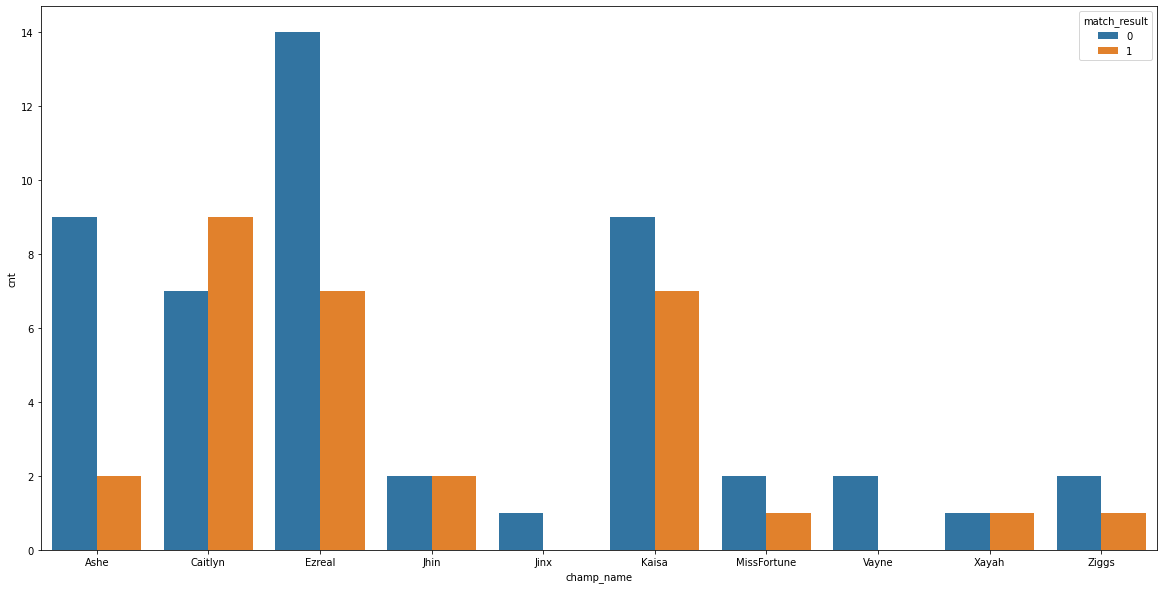

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x = carry_champ_result["champ_name"] , y= carry_champ_result['cnt'], hue=carry_champ_result['match_result'])

##### 이즈리얼 승리/패배 분석

In [55]:
ezreal = temp_carry[temp_carry['champ_name'] == 'Ezreal']
ezreal

,champ_name,role,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward,match_result
7,Ezreal,CARRY,12,6,7,8,81673,21703,136,8,2,0,13,0
8,Ezreal,CARRY,14,4,9,8,122759,21883,181,7,4,0,26,0
10,Ezreal,CARRY,12,1,1,2,82395,7743,150,8,0,1,17,0
13,Ezreal,CARRY,13,3,3,7,97183,13250,156,9,1,1,21,0
15,Ezreal,CARRY,16,11,8,3,190242,35787,176,12,8,2,29,1
29,Ezreal,CARRY,18,6,11,6,225297,20098,275,11,6,1,27,0
33,Ezreal,CARRY,12,0,3,3,75569,9445,154,9,1,0,14,0
55,Ezreal,CARRY,9,3,2,6,23997,5324,51,6,1,1,6,0
58,Ezreal,CARRY,10,3,1,6,55409,8197,119,6,1,0,8,0
65,Ezreal,CARRY,11,3,0,3,68837,7108,145,7,1,2,11,0


In [57]:
ezreal_result = ezreal.groupby('match_result').mean()
ezreal_result

,champ_lv,kill,assist,death,total_damage,champ_damage,cs,install_ward,remove_ward,control_ward,score_ward
match_result,,,,,,,,,,,
0,12.142857,3.000000,4.857143,5.285714,89976.214286,13555.214286,146.214286,7.928571,2.285714,0.928571,17.428571
1,15.142857,8.571429,10.285714,2.571429,141430.714286,24167.714286,167.428571,11.000000,3.428571,1.714286,23.000000


###### 결론

* 승리 할때
 - 챔프 평균 레벨 15 이상
 - 킬 8 이상
 - 어시 10 이상
 - 데스 3 미만
 - 총 데미지 14만 이상
 - 챔프 데미지 2만 4천 이상
 - CS 167개 이상
 - 설치 와드 11개 이상
 - 와드 스코어 23개 이상 

 * 패배할 때
  - 챔프 평균 레벨 12
  - 평균 킬 3 
  - 평균 어시 4
  - 평균 데스 5
  - 총 평균 데미지 9만
  - 챔프 평균 데미지 1만 3천
  - 평균 CS 146개
  - 평균 설치 와드 8개
  - 평균 와드 스코어 17개

* 결론 : 패배할 때는 승리할 때보다 모든 평균 지표가 낮다 
